In [1]:
from glob import glob

import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

import rasterio as rio
from rasterio.plot import plotting_extent
from rasterio.plot import show
from rasterio.plot import reshape_as_raster, reshape_as_image

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

from scipy.io import loadmat
from sklearn.metrics import classification_report, accuracy_score

import plotly.graph_objects as go
import PIL
import PIL.Image

np.seterr(divide='ignore', invalid='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [2]:
def getFilesNewForY(basePath):
    dirs = glob(basePath+"/*/")
    print(dirs)
    #print(dirs)
    for _dir in dirs:
        files = glob(_dir+"*Scene_classification*.tiff")
        file = files[0]
        #print(files)
        yield file

In [3]:
fileNamesY = list(getFilesNewForY("/tmp/shared/dataset4"))
fileNamesY

['/tmp/shared/dataset4/9/', '/tmp/shared/dataset4/13/', '/tmp/shared/dataset4/5/', '/tmp/shared/dataset4/14/', '/tmp/shared/dataset4/11/', '/tmp/shared/dataset4/12/', '/tmp/shared/dataset4/15/', '/tmp/shared/dataset4/7/', '/tmp/shared/dataset4/10/', '/tmp/shared/dataset4/6/', '/tmp/shared/dataset4/4/', '/tmp/shared/dataset4/1/', '/tmp/shared/dataset4/3/', '/tmp/shared/dataset4/8/', '/tmp/shared/dataset4/2/']


['/tmp/shared/dataset4/9/2022-08-28-00_00_2022-08-28-23_59_Sentinel-2_L2A_Scene_classification_map.tiff',
 '/tmp/shared/dataset4/13/2022-08-10-00_00_2022-08-10-23_59_Sentinel-2_L2A_Scene_classification_map.tiff',
 '/tmp/shared/dataset4/5/2022-10-11-00_00_2022-10-11-23_59_Sentinel-2_L2A_Scene_classification_map.tiff',
 '/tmp/shared/dataset4/14/2022-08-01-00_00_2022-08-01-23_59_Sentinel-2_L2A_Scene_classification_map.tiff',
 '/tmp/shared/dataset4/11/2022-08-25-00_00_2022-08-25-23_59_Sentinel-2_L2A_Scene_classification_map.tiff',
 '/tmp/shared/dataset4/12/2022-08-25-00_00_2022-08-25-23_59_Sentinel-2_L2A_Scene_classification_map.tiff',
 '/tmp/shared/dataset4/15/2022-07-27-00_00_2022-07-27-23_59_Sentinel-2_L2A_Scene_classification_map.tiff',
 '/tmp/shared/dataset4/7/2022-10-11-00_00_2022-10-11-23_59_Sentinel-2_L2A_Scene_classification_map.tiff',
 '/tmp/shared/dataset4/10/2022-08-24-00_00_2022-08-24-23_59_Sentinel-2_L2A_Scene_classification_map.tiff',
 '/tmp/shared/dataset4/6/2022-10-11-00_0

In [4]:
def getFilesNew(basePath):
    dirs = glob(basePath+"/*/")
    print(dirs)
    for _dir in dirs:
        files = glob(_dir+"*B?*.tiff")
        #print(files)
        yield files

In [5]:
fileNamesX = list(getFilesNew("/tmp/shared/dataset4"))
fileNamesX

['/tmp/shared/dataset4/9/', '/tmp/shared/dataset4/13/', '/tmp/shared/dataset4/5/', '/tmp/shared/dataset4/14/', '/tmp/shared/dataset4/11/', '/tmp/shared/dataset4/12/', '/tmp/shared/dataset4/15/', '/tmp/shared/dataset4/7/', '/tmp/shared/dataset4/10/', '/tmp/shared/dataset4/6/', '/tmp/shared/dataset4/4/', '/tmp/shared/dataset4/1/', '/tmp/shared/dataset4/3/', '/tmp/shared/dataset4/8/', '/tmp/shared/dataset4/2/']


[['/tmp/shared/dataset4/9/2022-08-28-00_00_2022-08-28-23_59_Sentinel-2_L2A_B04_(Raw).tiff',
  '/tmp/shared/dataset4/9/2022-08-28-00_00_2022-08-28-23_59_Sentinel-2_L2A_B08_(Raw).tiff',
  '/tmp/shared/dataset4/9/2022-08-28-00_00_2022-08-28-23_59_Sentinel-2_L2A_B09_(Raw).tiff',
  '/tmp/shared/dataset4/9/2022-08-28-00_00_2022-08-28-23_59_Sentinel-2_L2A_B05_(Raw).tiff',
  '/tmp/shared/dataset4/9/2022-08-28-00_00_2022-08-28-23_59_Sentinel-2_L2A_B01_(Raw).tiff',
  '/tmp/shared/dataset4/9/2022-08-28-00_00_2022-08-28-23_59_Sentinel-2_L2A_B12_(Raw).tiff',
  '/tmp/shared/dataset4/9/2022-08-28-00_00_2022-08-28-23_59_Sentinel-2_L2A_B11_(Raw).tiff',
  '/tmp/shared/dataset4/9/2022-08-28-00_00_2022-08-28-23_59_Sentinel-2_L2A_B8A_(Raw).tiff',
  '/tmp/shared/dataset4/9/2022-08-28-00_00_2022-08-28-23_59_Sentinel-2_L2A_B06_(Raw).tiff',
  '/tmp/shared/dataset4/9/2022-08-28-00_00_2022-08-28-23_59_Sentinel-2_L2A_B03_(Raw).tiff',
  '/tmp/shared/dataset4/9/2022-08-28-00_00_2022-08-28-23_59_Sentinel-2_L2A_B02_(

In [6]:
fileNameTest = fileNamesX[0][0]
pic = PIL.Image.open(str(fileNameTest))
imageData = np.asarray(pic.getdata())
print("Min value ", np.min(imageData), " max value ", np.max(imageData))
imageData.shape

Min value  nan  max value  nan


(950000,)

In [9]:
def getFilesArrayNew(paths):
    l = []
    for i in paths:
        s = []
        for j in i:
            with rio.open(j, 'r') as f:
                ff = f.read(1)
                ff = ff[0:608, 0: 1024]
                s.append(ff)
        l.append(s)
    arr_st_new = np.stack(l)
    return  arr_st_new

In [10]:
filesX_array = getFilesArrayNew(fileNamesX)
#filesX_array = filesX_array / np.max(filesX_array)
# std = np.std(filesX_array)
# mean= np.mean(filesX_array)
#
# filesX_array-=mean
# filesX_array/=std

In [11]:
print("Min value: ", np.min(filesX_array), " max value: ", np.max(filesX_array))

Min value:  0.0  max value:  2.1167


In [12]:
def getFilesArrayNewY(paths):
    l = []
    for i in paths:
        with rio.open(i,'r') as f:
            r = f.read(1)
            g = f.read(2)
            b =  f.read(3)
            r = r[0:608, 0:1024]
            g = g[0:608, 0:1024]
            b = b[0:608, 0:1024]
            rgb_arr = [r, g ,b]
            l.append(rgb_arr)
            # l.append(rgb)
    return l

In [13]:
_filexY_array = np.asarray(getFilesArrayNewY(fileNamesY))
#_filexY_array = np.moveaxis(_filexY_array, 1,0)
_filexY_array = np.asarray(_filexY_array * 255).astype(int)
_filexY_array.shape

(15, 3, 608, 1024)

In [14]:
__filesY_array  = []
for i in _filexY_array:
    r = i[0]
    g = i[1]
    b = i[2]
    rgb  = r
    rgb = np.left_shift(rgb, 8) + g
    rgb = np.left_shift(rgb, 8) + b
    __filesY_array.append(rgb)

In [88]:
filexY_array = np.asarray(__filesY_array)
filexY_array.shape

(15, 608, 1024)

In [32]:
unique_valsY = np.unique(filexY_array)
print(unique_valsY)
#filexY_array[filexY_array == 1] = 100

[       0      255    40960  3092271  6566400  6605055  8421504 12632256
 16770650 16777215]


<p color="#000000"> Category 1 </p>
<p color="#0000ff"> Category 2 </p>
<p color="#00a000"> Category 3 </p>
<p color="#643200"> Category 4 </p>
<p color="#64C8FF"> Category 5 </p>
<p color="#808080"> Category 6 </p>
<p color="#C0C0C0"> Category 7 </p>
<p color="#FFE65A"> Category 8 </p>
<p color="#FFFFFF"> Category 9 </p>


In [33]:
num_of_y = filexY_array.shape[0]*filexY_array.shape[1]*filexY_array.shape[2]
cat1_c = np.count_nonzero(filexY_array == 0)
cat2_c = np.count_nonzero(filexY_array == 255)
cat3_c = np.count_nonzero(filexY_array == 40960)
cat4_c = np.count_nonzero(filexY_array == 6566400)
cat5_c = np.count_nonzero(filexY_array == 6605055)
cat6_c = np.count_nonzero(filexY_array == 8421504)
cat7_c = np.count_nonzero(filexY_array == 12632256)
cat8_c = np.count_nonzero(filexY_array == 16770650)
cat9_c = np.count_nonzero(filexY_array == 16777215)
cat_all = []
for idx, num in enumerate(unique_valsY):
    cnt = np.count_nonzero(filexY_array == num)
    print("category " + str(idx) + " count " + str(cnt))
    cat_all.append(cnt)


category 0 count 115
category 1 count 385722
category 2 count 4330624
category 3 count 34
category 4 count 24327
category 5 count 508655
category 6 count 4035
category 7 count 117898
category 8 count 3960137
category 9 count 7333


In [89]:
for idx, i in enumerate(unique_valsY):
        filexY_array [ filexY_array == i] = idx

In [35]:
# print(np.unique(filexY_array))

In [128]:
filexY_array [ filexY_array == 3] = 0
filexY_array [ filexY_array == 4] = 0
filexY_array [ filexY_array == 5] = 0
filexY_array [ filexY_array == 6] = 0
filexY_array [ filexY_array == 7] = 0
filexY_array [ filexY_array == 9] = 0

In [129]:
print(np.unique(filexY_array))

[0 1 2 8]


In [130]:
filexY_array [ filexY_array == 8] = 3


(array([ 662397.,       0.,       0.,  385722.,       0.,       0.,
        4330624.,       0.,       0., 3960137.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

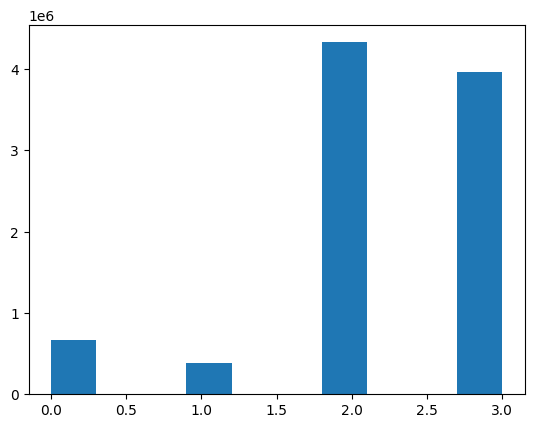

In [131]:
plt.hist(filexY_array.reshape(-1))

In [40]:
x_np = np.asarray(filesX_array)
x_np.shape

(15, 12, 608, 1024)

In [41]:
x_np2 = x_np[:,:,0:608,0:1024]
x_np2.shape

(15, 12, 608, 1024)

In [42]:
x_np2 = np.moveaxis(x_np2,1,0)
x_np2.shape

(12, 15, 608, 1024)

In [43]:
x_np_combined = x_np2.reshape(12,-1,1024)
x_np_combined.shape

(12, 9120, 1024)

In [44]:
x_np_combined.shape

(12, 9120, 1024)

In [45]:
x_np_combined = np.moveaxis(x_np_combined, 0, -1)
x_np_combined.shape

(9120, 1024, 12)

In [46]:
x_data = x_np_combined.reshape(-1,32,32,12)

In [47]:
x_data.shape

(9120, 32, 32, 12)

In [164]:
x_data_summed = np.sum(x_data, axis=3)
x_data_summed.shape

(9120, 32, 32)

In [48]:
filexY_array.shape

(15, 608, 1024)

In [132]:
y_np =  filexY_array[:,0:608,0:1024]
y_np.shape

(15, 608, 1024)

In [133]:
y_np2 = y_np.reshape(-1, 1024)
y_np2.shape

(9120, 1024)

In [134]:
y_data = y_np2.reshape(-1, 32,32)
y_data.shape

(9120, 32, 32)

In [135]:
#Let's import some important Libraries
import tensorflow as tf
from keras.models import Sequential, Model
from keras.layers import Dense, Input
from keras.utils import np_utils
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import pandas as pd
from keras.layers import *
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [136]:
y_cat = np_utils.to_categorical(y_data)

In [176]:
model_new = tf.keras.models.Sequential([
    BatchNormalization(input_shape=(32,32,12)),
    Conv2D(32,3,padding='same'),
    Conv2D(32,3,padding='same'),
    Activation('relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.5),
    BatchNormalization(),

    Conv2D(64,3, padding='same'),
    Conv2D(64,3, padding='same'),
    Activation('relu'),
    MaxPooling2D(pool_size=(2,2),name='feature_layer'),
    Dropout(0.5),
    BatchNormalization(),

    #We are naming this layer, as we will extract features from it in future, JUST WAIT !!!
    Conv2D(128,3, padding='same'),
    Conv2D(128,3, padding='same'),
    Activation('relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.5),
    BatchNormalization(),
    # Flatten(),
    # Dense(512),
    # Dense(1024),
    # Dense(2048),
    # Activation('relu'),
    # Dropout(0.7),
    # Reshape((4,4,128)),
    #Dense(64),
    Dense(128),
    Dense(64),
    Dense(4),
    Dense(64),
    Dense(128),
    BatchNormalization(),
    #Activation('relu'),
    #Dense(256),
    #Dense(128),
    #Activation('relu'),
    #Dropout(0.7),
    #Reshape((4,4,128)),
    UpSampling2D((2,2)),
    Conv2D(128,3, padding='same'),
    Conv2D(128,3, padding='same'),
    Activation('relu'),
    UpSampling2D((2,2)),
    Dropout(0.5),
    BatchNormalization(),
    Conv2D(64,3, padding='same'),
    Conv2D(64,3, padding='same'),
    Activation('relu'),
    UpSampling2D((2,2)),
    Dropout(0.5),
    BatchNormalization(),
    Conv2D(32,3, padding='same'),
    Conv2D(32,3, padding='same'),
    Activation('relu'),
    Conv2D(4,3,padding='same'),
    #Dropout(0.6),
    #BatchNormalization(),
    # model.add(Flatten())
    # model.add(Dense(24))
    # model.add(Activation('relu'))
    # model.add(Dropout(0.5))
    # model.add(Dense(6))
    Activation('softmax'),
])

In [177]:
model_new.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [178]:
model_new.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_56 (Bat  (None, 32, 32, 12)       48        
 chNormalization)                                                
                                                                 
 conv2d_104 (Conv2D)         (None, 32, 32, 32)        3488      
                                                                 
 conv2d_105 (Conv2D)         (None, 32, 32, 32)        9248      
                                                                 
 activation_56 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 dropout_40 (Dropout)        (None, 16, 16, 32)       

In [179]:
es = EarlyStopping(monitor='val_loss')
mc = ModelCheckpoint('best_model_new.h5', monitor='val_loss')
cb = [es,mc]

In [180]:
history2 = model_new.fit(x_data, y_cat, epochs=100,batch_size=32, validation_split=0.2)

Epoch 1/100
228/228 [==============================] - 5s 18ms/step - loss: 0.5470 - accuracy: 0.7737 - val_loss: 0.6933 - val_accuracy: 0.7508
Epoch 2/100
228/228 [==============================] - 4s 16ms/step - loss: 0.4221 - accuracy: 0.8272 - val_loss: 0.5401 - val_accuracy: 0.7774
Epoch 3/100
228/228 [==============================] - 4s 16ms/step - loss: 0.3943 - accuracy: 0.8378 - val_loss: 0.5827 - val_accuracy: 0.7521
Epoch 4/100
228/228 [==============================] - 4s 16ms/step - loss: 0.3725 - accuracy: 0.8468 - val_loss: 0.4817 - val_accuracy: 0.8069
Epoch 5/100
228/228 [==============================] - 4s 17ms/step - loss: 0.4101 - accuracy: 0.8313 - val_loss: 0.5984 - val_accuracy: 0.7590
Epoch 6/100
228/228 [==============================] - 4s 16ms/step - loss: 0.3757 - accuracy: 0.8460 - val_loss: 0.4762 - val_accuracy: 0.8077
Epoch 7/100
228/228 [==============================] - 4s 16ms/step - loss: 0.3586 - accuracy: 0.8520 - val_loss: 0.4770 - val_accuracy:

KeyboardInterrupt: 

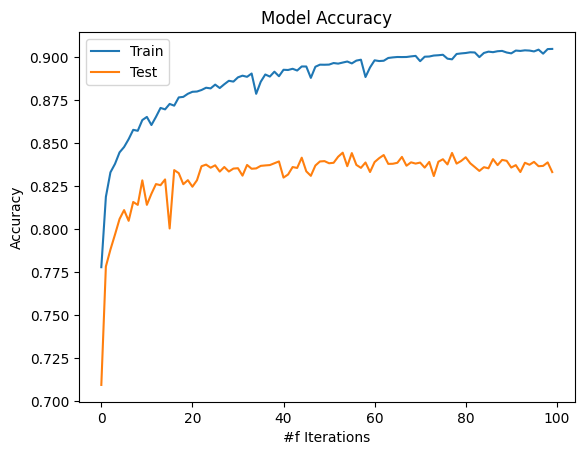

In [142]:
    plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('#f Iterations')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

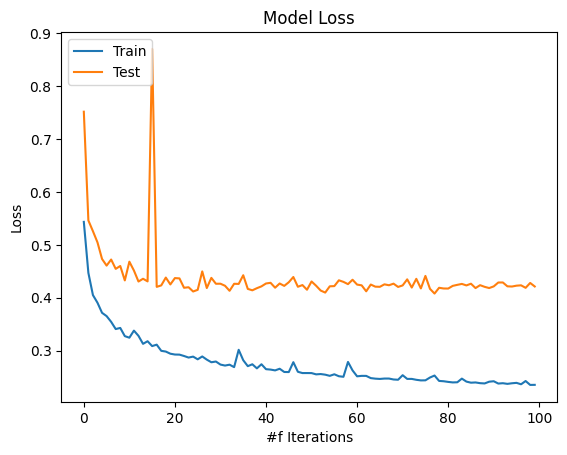

In [143]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('#f Iterations')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Check

In [144]:
from glob import glob
S_sentinel_bands = glob("/tmp/shared/dataset4/2/*B?*.tiff")
S_sentinel_bands.sort()
S_sentinel_bands

['/tmp/shared/dataset4/2/2022-10-11-00_00_2022-10-11-23_59_Sentinel-2_L2A_B01_(Raw).tiff',
 '/tmp/shared/dataset4/2/2022-10-11-00_00_2022-10-11-23_59_Sentinel-2_L2A_B02_(Raw).tiff',
 '/tmp/shared/dataset4/2/2022-10-11-00_00_2022-10-11-23_59_Sentinel-2_L2A_B03_(Raw).tiff',
 '/tmp/shared/dataset4/2/2022-10-11-00_00_2022-10-11-23_59_Sentinel-2_L2A_B04_(Raw).tiff',
 '/tmp/shared/dataset4/2/2022-10-11-00_00_2022-10-11-23_59_Sentinel-2_L2A_B05_(Raw).tiff',
 '/tmp/shared/dataset4/2/2022-10-11-00_00_2022-10-11-23_59_Sentinel-2_L2A_B06_(Raw).tiff',
 '/tmp/shared/dataset4/2/2022-10-11-00_00_2022-10-11-23_59_Sentinel-2_L2A_B07_(Raw).tiff',
 '/tmp/shared/dataset4/2/2022-10-11-00_00_2022-10-11-23_59_Sentinel-2_L2A_B08_(Raw).tiff',
 '/tmp/shared/dataset4/2/2022-10-11-00_00_2022-10-11-23_59_Sentinel-2_L2A_B09_(Raw).tiff',
 '/tmp/shared/dataset4/2/2022-10-11-00_00_2022-10-11-23_59_Sentinel-2_L2A_B11_(Raw).tiff',
 '/tmp/shared/dataset4/2/2022-10-11-00_00_2022-10-11-23_59_Sentinel-2_L2A_B12_(Raw).tiff',

In [145]:
l = []
for i in S_sentinel_bands:
  with rio.open(i, 'r') as f:
    l.append(f.read(1))

In [146]:
arr_st = np.stack(l)
# std2 = np.std(arr_st)
# mean2= np.mean(arr_st)
#
# arr_st-=mean2
# arr_st/=std2
#arr_st = arr_st / np.max(filesX_array)

In [147]:
arr_st.shape

(12, 638, 1094)

In [148]:
print("Min " , np.min(arr_st), " and max ", np.max(arr_st))

Min  0.0  and max  1.1978


In [149]:
x = np.moveaxis(arr_st, 0, -1)
x.shape

(638, 1094, 12)

In [150]:
x1_v = x.shape[0]%32
x1_h = x.shape[1]%32
res1 = x.shape[0]-x1_v
res2 = x.shape[1]-x1_h
xx = x[0:608,0:1024,:]

In [151]:
x_rr = xx.reshape(-1, 32,32,12)

In [152]:
x_r_new = x_np[7]
x_r_new = x_r_new[:,0:608,0:1024]
x_r_new2 = np.moveaxis(x_r_new, 0, -1)
x_r_new2 = x_r_new.reshape(-1, 32,32,12)

In [153]:
prediction = model_new.predict(x_rr,batch_size=32)

19/19 [==============================] - 1s 17ms/step


In [154]:
print("Min percentage: ", np.min(prediction), " max percentage: ", np.max(prediction), " shape: ", prediction.shape)

Min percentage:  6.449261e-11  max percentage:  0.9935947  shape:  (608, 32, 32, 4)


In [155]:
pred_cat = np.argmax(prediction,axis=3)
pred_cat.shape

(608, 32, 32)

In [156]:
pred_pxl = pred_cat.reshape(608,1024)

In [157]:
pred_pxl.shape

(608, 1024)

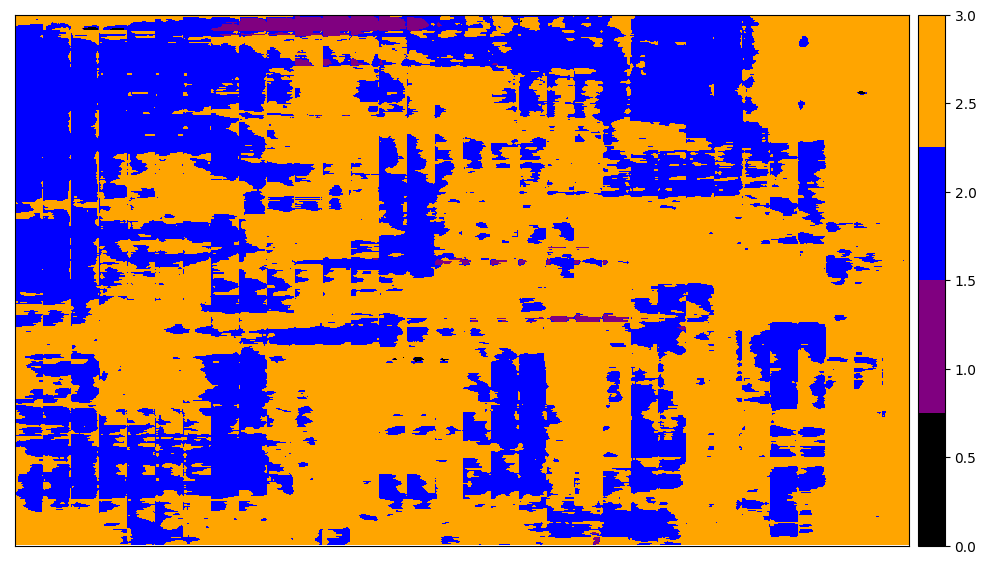

<AxesSubplot:>

In [158]:
ep.plot_bands(pred_pxl,
              cmap=ListedColormap(['black', 'purple','blue', 'orange']))

In [76]:
Check_images = glob("/tmp/shared/dataset4/2/*Scen*.tiff")
Check_images

['/tmp/shared/dataset4/2/2022-10-11-00_00_2022-10-11-23_59_Sentinel-2_L2A_Scene_classification_map.tiff']

In [77]:
from IPython.display import Image
PIL.Image.open(str(Check_images[0]))

UnidentifiedImageError: cannot identify image file '/tmp/shared/dataset4/2/2022-10-11-00_00_2022-10-11-23_59_Sentinel-2_L2A_Scene_classification_map.tiff'

In [78]:
# import cv2
#
# gray = cv2.imread("path/to/tiff/0.tiff", cv2.IMREAD_UNCHANGED)
#
# cv2.namedWindow("MyImage", cv2.WINDOW_NORMAL)
# cv2.imshow("MyImage", gray)
# cv2.waitKey(0)

In [159]:
item = y_np[7]
item.shape

(608, 1024)

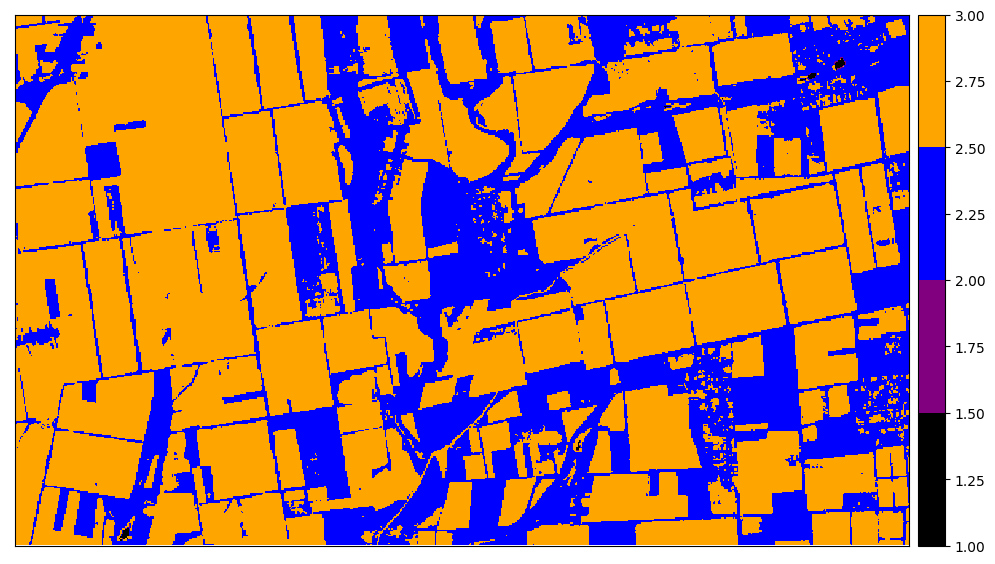

<AxesSubplot:>

In [160]:
ep.plot_bands(item,
              cmap=ListedColormap(['black', 'purple','blue', 'orange']))

In [161]:
accuracy_score(pred_cat.reshape(-1), item.reshape(-1))

0.4828250282689145

(array([3.23000e+02, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        2.01288e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00, 4.20981e+05]),
 array([1. , 1.2, 1.4, 1.6, 1.8, 2. , 2.2, 2.4, 2.6, 2.8, 3. ]),
 <BarContainer object of 10 artists>)

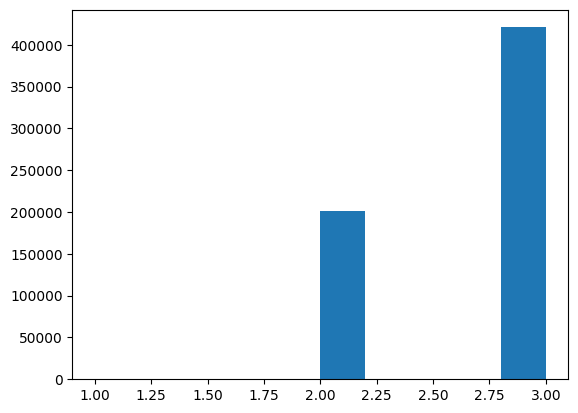

In [162]:
plt.hist(item.reshape(-1))

(array([2.08000e+02, 0.00000e+00, 0.00000e+00, 5.84500e+03, 0.00000e+00,
        0.00000e+00, 2.37662e+05, 0.00000e+00, 0.00000e+00, 3.78877e+05]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

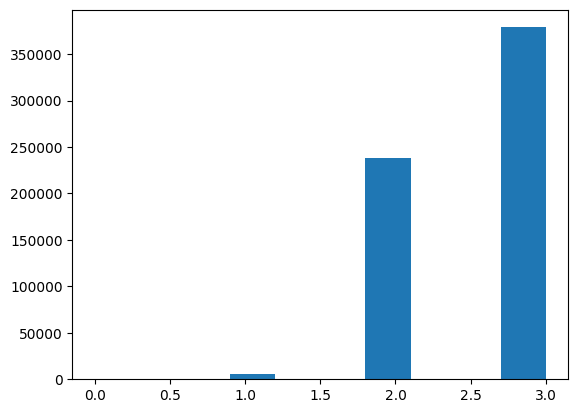

In [163]:
plt.hist(pred_cat.reshape(-1))